In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests 

C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Need to find missing address that was unavailable in openstreetmap and locate in open map.sg
# First we need to find the null values and change the name
# the issue is that sometimes a name change will allow openstreetmap to find the location
# so its not necessarily the case that the map is outdated or the place is new.

hdb_string = 'HDBdata with district_coord.csv'

df = pd.read_csv(hdb_string)

In [3]:
df.head()

,District,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude
0,20,1 01 2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,5272.727273,1.375748,103.854640
1,20,1 01 2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,3731.343284,1.369525,103.837238
2,20,1 01 2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,3910.447761,1.380760,103.835425
3,20,1 01 2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,3897.058824,1.366213,103.857175
4,20,1 01 2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,3955.223881,1.380987,103.835076


In [4]:
df[df['Latitude'] == 0]

,District,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude
56,16,1 01 2017,BEDOK,2 ROOM,101,BEDOK NTH AVE 4,04 TO 06,45.0,Improved,1978,60,238000.0,5288.888889,0.0,0.0
57,16,1 01 2017,BEDOK,3 ROOM,548,BEDOK NTH AVE 1,04 TO 06,68.0,New Generation,1980,62,272000.0,4000.000000,0.0,0.0
58,16,1 01 2017,BEDOK,3 ROOM,75,BEDOK NTH RD,07 TO 09,59.0,Improved,1978,60,278000.0,4711.864407,0.0,0.0
59,16,1 01 2017,BEDOK,3 ROOM,550,BEDOK NTH AVE 1,01 TO 03,68.0,New Generation,1980,62,280000.0,4117.647059,0.0,0.0
65,16,1 01 2017,BEDOK,3 ROOM,528,BEDOK NTH ST 3,13 TO 15,68.0,New Generation,1979,61,290000.0,4264.705882,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113762,25,1 11 2021,WOODLANDS,5 ROOM,688B,WOODLANDS DR 75,04 TO 06,110.0,Premium Apartment,2004,82,490000.0,4454.545455,0.0,0.0
113763,25,1 11 2021,WOODLANDS,5 ROOM,689B,WOODLANDS DR 75,10 TO 12,110.0,Premium Apartment,2004,82,475000.0,4318.181818,0.0,0.0
113764,25,1 11 2021,WOODLANDS,5 ROOM,690C,WOODLANDS DR 75,04 TO 06,110.0,Premium Apartment,2004,82,475000.0,4318.181818,0.0,0.0
113765,25,1 11 2021,WOODLANDS,5 ROOM,688C,WOODLANDS DR 75,04 TO 06,111.0,Premium Apartment,2004,82,475000.0,4279.279279,0.0,0.0


In [5]:
df_search_corr = df[df['Latitude'] == 0]

In [6]:
df_search_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13937 entries, 56 to 113766
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   District             13937 non-null  int64  
 1   month                13937 non-null  object 
 2   town                 13937 non-null  object 
 3   flat_type            13937 non-null  object 
 4   block                13937 non-null  object 
 5   street_name          13937 non-null  object 
 6   storey_range         13937 non-null  object 
 7   floor_area_sqm       13937 non-null  float64
 8   flat_model           13937 non-null  object 
 9   lease_commence_date  13937 non-null  int64  
 10  remaining_lease      13937 non-null  int64  
 11  resale_price         13937 non-null  float64
 12  Price/sqm            13937 non-null  float64
 13  Latitude             13937 non-null  float64
 14  Longitude            13937 non-null  float64
dtypes: float64(5), int64(3), object(7)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 [Text(0, 0, 'BEDOK NTH RD'),
  Text(1, 0, 'BEDOK NTH ST 3'),
  Text(2, 0, 'LOR 1 TOA PAYOH'),
  Text(3, 0, 'BT BATOK WEST AVE 6'),
  Text(4, 0, 'SERANGOON NTH AVE 4'),
  Text(5, 0, 'UPP SERANGOON CRES'),
  Text(6, 0, 'BT PANJANG RING RD'),
  Text(7, 0, 'LOR 1A TOA PAYOH'),
  Text(8, 0, 'SERANGOON NTH AVE 1'),
  Text(9, 0, 'LOR 2 TOA PAYOH'),
  Text(10, 0, 'BT BATOK WEST AVE 5'),
  Text(11, 0, 'LOR 8 TOA PAYOH'),
  Text(12, 0, 'LOR 7 TOA PAYOH'),
  Text(13, 0, 'UPP BOON KENG RD'),
  Text(14, 0, 'JLN BT MERAH'),
  Text(15, 0, 'BT BATOK EAST AVE 5'),
  Text(16, 0, 'NEW UPP CHANGI RD'),
  Text(17, 0, 'WOODLANDS DR 75'),
  Text(18, 0, 'BT BATOK ST 52'),


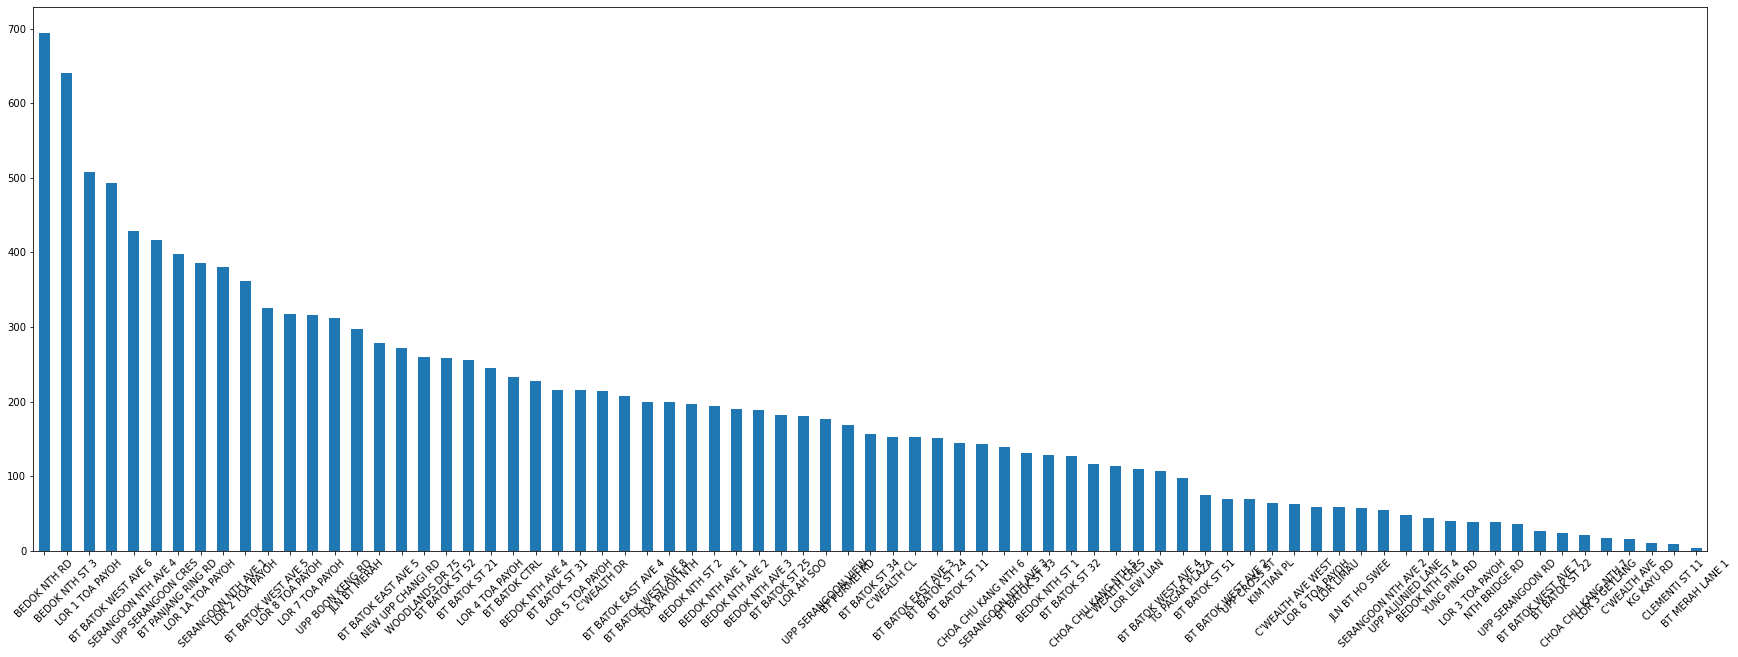

In [7]:
fig, axis = plt.subplots(figsize = (30,10))
df_search_corr.street_name.value_counts().plot(kind='bar')
plt.xticks(rotation=45) 

In [8]:
# BT is bulit
# NTH is north
# C'wealth is commonwealth
# KG is Kampong
# JLN is Jalan
# CRES is crescent
# DR is Drive
# RD is road
# CTRL is central

df_search_corr.street_name = df_search_corr.street_name.str.replace('NTH', 'NORTH')\
.str.replace('BT','BUKIT').str.replace("C'WEALTH",'COMMONWEALTH').str.replace('KG','KAMPONG').str.replace('JLN','JALAN')\
.str.replace('CRES','CRESCENT').str.replace('CTRL','CENTRAL').str.replace('UPP','UPPER')

C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 [Text(0, 0, 'BEDOK NORTH RD'),
  Text(1, 0, 'BEDOK NORTH ST 3'),
  Text(2, 0, 'LOR 1 TOA PAYOH'),
  Text(3, 0, 'BUKIT BATOK WEST AVE 6'),
  Text(4, 0, 'SERANGOON NORTH AVE 4'),
  Text(5, 0, 'UPPER SERANGOON CRESCENT'),
  Text(6, 0, 'BUKIT PANJANG RING RD'),
  Text(7, 0, 'LOR 1A TOA PAYOH'),
  Text(8, 0, 'SERANGOON NORTH AVE 1'),
  Text(9, 0, 'LOR 2 TOA PAYOH'),
  Text(10, 0, 'BUKIT BATOK WEST AVE 5'),
  Text(11, 0, 'LOR 8 TOA PAYOH'),
  Text(12, 0, 'LOR 7 TOA PAYOH'),
  Text(13, 0, 'UPPER BOON KENG RD'),
  Text(14, 0, 'JALAN BUKIT MERAH'),
  Text(15, 0, 'BUKIT BATOK EAST AVE 5'),
  Text(16, 0, 'NEW UPPER CHANGI RD'),
  Text(17, 0, 'WOODLANDS DR 75')

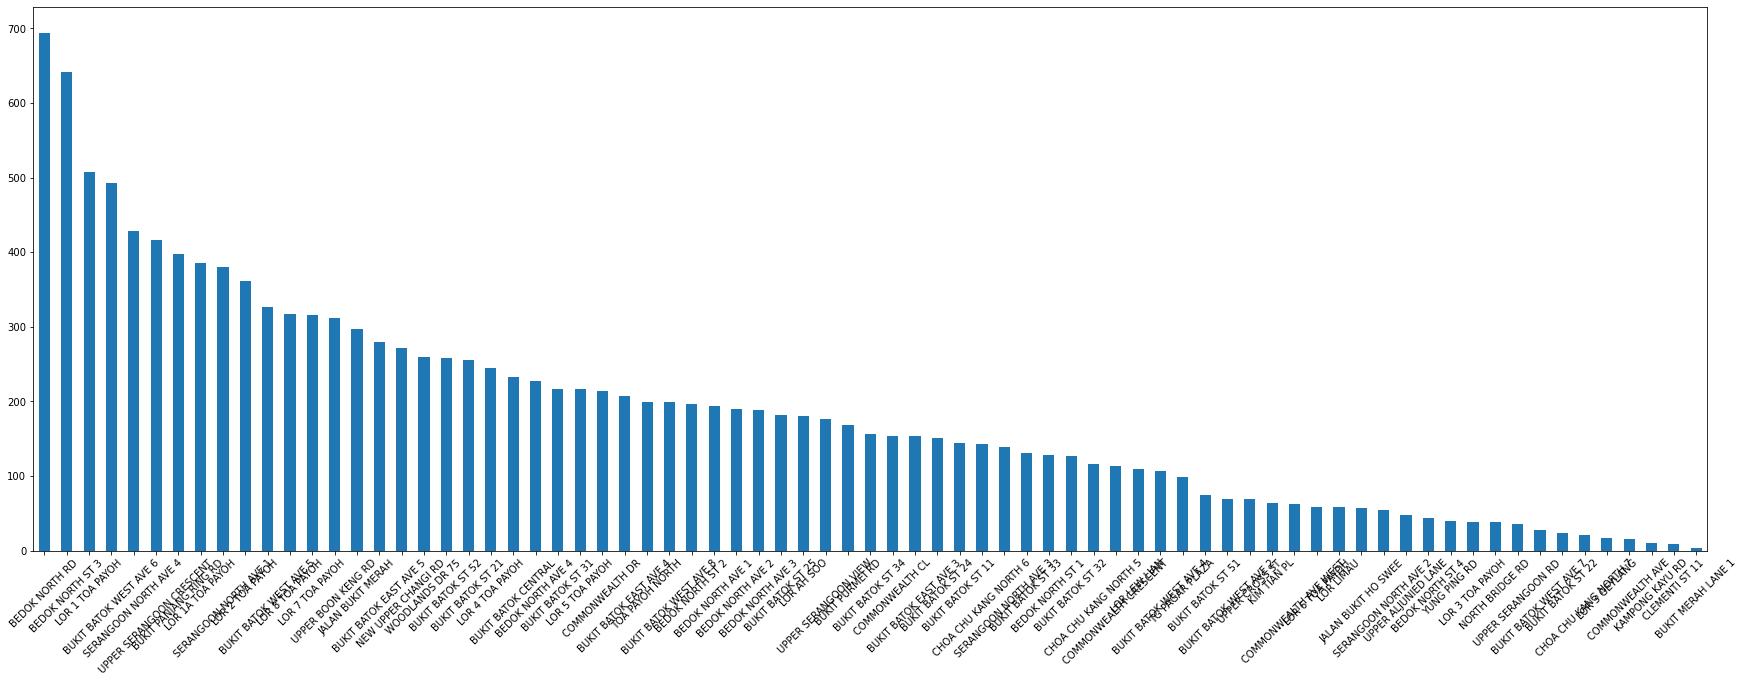

In [9]:
fig, axis = plt.subplots(figsize = (30,10))
df_search_corr.street_name.value_counts().plot(kind='bar')
plt.xticks(rotation=45) 

In [14]:
addresslist = df_search_corr.block + ' ' + df_search_corr.street_name

In [15]:
len(addresslist)

13937

In [16]:
addresslist[:10]

56     101 BEDOK NORTH AVE 4
57     548 BEDOK NORTH AVE 1
58         75 BEDOK NORTH RD
59     550 BEDOK NORTH AVE 1
65      528 BEDOK NORTH ST 3
66      534 BEDOK NORTH ST 3
67     550 BEDOK NORTH AVE 1
68         77 BEDOK NORTH RD
72    57 NEW UPPER CHANGI RD
73    57 NEW UPPER CHANGI RD
dtype: object

In [ ]:
all_coordinates = []

for index, address in enumerate(addresslist):
    print('Progress {} percent \n'.format(np.round(index/len(addresslist)*100,2)))
    print('Searching for ', address)
    query = 'https://nominatim.openstreetmap.org/search?q=' + address + '&countrycodes=sg&limit=1&format=json'
    res = requests.get(query)
    result = eval(res.text)
    try:
        lat = result[0]['lat']
        long = result[0]['lon']
        print('Lat is ', lat)
        print('Long is ' , long)
        all_coordinates.append([lat, long])
        print('Information Found and appended \n')
        print('*'*25 , '\n')
    except:
        try:
            print('No results from openstreetmap, searching from onemap.sg')
            second_query = 'https://developers.onemap.sg/commonapi/search?searchVal='+ address +'&returnGeom=Y&getAddrDetails=Y&pageNum=1'
            res = requests.get(second_query)
            result = eval(res.text)
            lat = result['results'][0]['LATITUDE']
            lon = result['results'][0]['LONGITUDE']
            print('Lat is ', lat)
            print('Long is ' , long)
            all_coordinates.append([lat, long])
            print('Information Found and appended \n')
            print('*'*25 , '\n')
        except:
            print('Lat and long is unavailable')
            all_coordinates.append([0, 0])
            print('Information missing and appended null values \n')
            print('*'*25 , '\n')
            continue       

Progress 0.0 percent 

Searching for  101 BEDOK NORTH AVE 4
Lat is  1.33446945
Long is  103.93793810303602
Information Found and appended 

************************* 

Progress 0.01 percent 

Searching for  548 BEDOK NORTH AVE 1
Lat is  1.33129105
Long is  103.92688264364844
Information Found and appended 

************************* 

Progress 0.01 percent 

Searching for  75 BEDOK NORTH RD
Lat is  1.3278894
Long is  103.94211844583151
Information Found and appended 

************************* 

Progress 0.02 percent 

Searching for  550 BEDOK NORTH AVE 1
Lat is  1.33233665
Long is  103.92630399499696
Information Found and appended 

************************* 

Progress 0.03 percent 

Searching for  528 BEDOK NORTH ST 3
Lat is  1.33466835
Long is  103.92764481458067
Information Found and appended 

************************* 

Progress 0.04 percent 

Searching for  534 BEDOK NORTH ST 3
Lat is  1.33305485
Long is  103.92466155252279
Information Found and appended 

**********************

In [ ]:
pd.DataFrame(all_coordinates).head()

In [ ]:
index_list = df_search_corr.index

In [ ]:
for i, index in enumerate(index_list):
    df_search_corr.at[index,'Latitude'] = all_coordinates[i][0]
    df_search_corr.at[index,'Longitude'] = all_coordinates[i][1]

In [ ]:
df_search_corr.head()

In [ ]:
pd.concat(df_search_corr,pd.DataFrame(all_coordinates))

In [ ]:
df_search_corr.merge(pd.DataFrame(all_coordinates))

In [ ]:
df_search_corr.to_csv('MissingCorr.csv', index= False)